In [1]:
from __future__ import print_function
import argparse
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR


In [2]:
class CnnNet(nn.Module):
    def __init__(self):
        super(CnnNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(5408, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output
    
    

In [3]:
class CnnNet2(nn.Module):
    def __init__(self):
        super(CnnNet2, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(2704, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output
    
    

In [4]:
class CnnNet3(nn.Module):
    def __init__(self):
        super(CnnNet3, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(2704, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        output = F.log_softmax(x, dim=1)
        return output
    
    

In [5]:
class CnnNet4(nn.Module):
    def __init__(self):
        super(CnnNet4, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(2704, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output
    
    

In [6]:
class CnnNet5(nn.Module):
    def __init__(self):
        super(CnnNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(4608, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output
    
    

In [17]:
class CnnNet6(nn.Module):
    def __init__(self):
        super(CnnNet6, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(4608, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output
    
    

In [7]:
def train( model, device, train_loader, optimizer,loss_fn, epoch):
    train_loss=0
    model.train()
    no_batches=0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        train_loss+=loss.item()
        no_batches+=1
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
    print("Epoch:", epoch, "sum loss:", train_loss, "batches", no_batches, "loss:", train_loss/no_batches,
         "accuracy:", 100. * correct / len(train_loader.dataset))  
    return train_loss/no_batches, 100. * correct / len(train_loader.dataset)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    loss_fn = nn.CrossEntropyLoss(reduction='sum')
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target)  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss, 100. * correct / len(test_loader.dataset)




In [8]:
use_cuda = torch.cuda.is_available()
torch.manual_seed(1)

device = torch.device("cuda" if use_cuda else "cpu")

train_kwargs = {'batch_size': 512}
test_kwargs = {'batch_size': 512}
if use_cuda:
    cuda_kwargs = {'num_workers': 1,
                   'pin_memory': True,
                   'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

transform=transforms.Compose([
        transforms.ToTensor()
        ])
dataset1 = datasets.MNIST('../data', train=True, download=True, transform=transform)
dataset2 = datasets.MNIST('../data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)



In [9]:
def returnModelAccAndLoss(model, device, train_loader, test_loader, optimizer, loss, epoch, scheduler):
    train_loss=[]
    test_loss=[]
    accuracy_train=[]
    accuracy_test=[]
    for epoch in range(1, epoch+1):
        tr_loss, tr_accuracy=train(model, device, train_loader, optimizer, loss, epoch)
        train_loss.append(tr_loss)
        accuracy_train.append(tr_accuracy)
        tst_loss, tst_accuracy = test(model, device, test_loader)
        test_loss.append(tst_loss)
        accuracy_test.append(tst_accuracy)
        #scheduler.step()
    return train_loss, accuracy_train, test_loss, accuracy_test

In [10]:
epoch=10
model = CnnNet().to(device)
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(pytorch_total_params)
optimizer = optim.Adadelta(model.parameters(), lr=0.01)
scheduler = StepLR(optimizer, step_size=1, gamma=0.1)
loss = nn.CrossEntropyLoss()
train_loss_1, accuracy_train_1, test_loss_1, test_accuracy_1 = returnModelAccAndLoss(model, device, train_loader, test_loader, optimizer, loss, epoch, scheduler)

    

693962
Epoch: 1 sum loss: 249.91138887405396 batches 118 loss: 2.1178931260513045 accuracy: 39.416666666666664

Test set: Average loss: 1.8503, Accuracy: 7163/10000 (72%)

Epoch: 2 sum loss: 191.33582997322083 batches 118 loss: 1.6214900845188205 accuracy: 62.13166666666667

Test set: Average loss: 1.2758, Accuracy: 7713/10000 (77%)

Epoch: 3 sum loss: 139.49066871404648 batches 118 loss: 1.1821243111359871 accuracy: 69.36333333333333

Test set: Average loss: 0.8975, Accuracy: 8154/10000 (82%)

Epoch: 4 sum loss: 109.92573076486588 batches 118 loss: 0.9315739895327616 accuracy: 74.145

Test set: Average loss: 0.7014, Accuracy: 8427/10000 (84%)

Epoch: 5 sum loss: 93.30238038301468 batches 118 loss: 0.7906981388391074 accuracy: 77.43666666666667

Test set: Average loss: 0.5917, Accuracy: 8609/10000 (86%)

Epoch: 6 sum loss: 82.83606100082397 batches 118 loss: 0.7020005169561354 accuracy: 79.58333333333333

Test set: Average loss: 0.5224, Accuracy: 8759/10000 (88%)

Epoch: 7 sum loss: 75

In [11]:
epoch=10
model = CnnNet2().to(device)
model2_params = sum(p.numel() for p in model.parameters())
optimizer = optim.Adadelta(model.parameters(), lr=1)
scheduler = StepLR(optimizer, step_size=1, gamma=0.1)
loss = nn.CrossEntropyLoss()
train_loss_2, accuracy_train_2, test_loss_2, test_accuracy_2 = returnModelAccAndLoss(model, device, train_loader, test_loader, optimizer, loss, epoch, scheduler)
    

Epoch: 1 sum loss: 83.18760146200657 batches 118 loss: 0.7049796734068353 accuracy: 77.33833333333334

Test set: Average loss: 0.3091, Accuracy: 9036/10000 (90%)

Epoch: 2 sum loss: 34.49631777405739 batches 118 loss: 0.2923416760513338 accuracy: 91.245

Test set: Average loss: 0.1559, Accuracy: 9514/10000 (95%)

Epoch: 3 sum loss: 25.04434584826231 batches 118 loss: 0.21224021905307042 accuracy: 93.71333333333334

Test set: Average loss: 0.1201, Accuracy: 9614/10000 (96%)

Epoch: 4 sum loss: 19.857280425727367 batches 118 loss: 0.16828203750616413 accuracy: 95.06333333333333

Test set: Average loss: 0.0896, Accuracy: 9720/10000 (97%)

Epoch: 5 sum loss: 17.017105761915445 batches 118 loss: 0.1442127606941987 accuracy: 95.71833333333333

Test set: Average loss: 0.0724, Accuracy: 9761/10000 (98%)

Epoch: 6 sum loss: 15.002892885357141 batches 118 loss: 0.1271431600453995 accuracy: 96.125

Test set: Average loss: 0.0655, Accuracy: 9777/10000 (98%)

Epoch: 7 sum loss: 13.594044726341963 b

In [12]:
epoch=25
model = CnnNet3().to(device)
model3_params = sum(p.numel() for p in model.parameters())
optimizer = optim.Adadelta(model.parameters(), lr=1)
scheduler = StepLR(optimizer, step_size=1, gamma=0.1)
loss = nn.CrossEntropyLoss()
train_loss_3, accuracy_train_3, test_loss_3, test_accuracy_3 = returnModelAccAndLoss(model, device, train_loader, test_loader, optimizer, loss, epoch, scheduler)
    

Epoch: 1 sum loss: 62.542104706168175 batches 118 loss: 0.5300178364929506 accuracy: 84.40166666666667

Test set: Average loss: 0.3078, Accuracy: 9061/10000 (91%)

Epoch: 2 sum loss: 25.74626710265875 batches 118 loss: 0.2181887042598199 accuracy: 93.68

Test set: Average loss: 0.1809, Accuracy: 9450/10000 (94%)

Epoch: 3 sum loss: 18.78127520531416 batches 118 loss: 0.15916334919757763 accuracy: 95.415

Test set: Average loss: 0.1286, Accuracy: 9629/10000 (96%)

Epoch: 4 sum loss: 15.399648357182741 batches 118 loss: 0.1305054945523961 accuracy: 96.32666666666667

Test set: Average loss: 0.1095, Accuracy: 9683/10000 (97%)

Epoch: 5 sum loss: 13.46974990144372 batches 118 loss: 0.11415042289359084 accuracy: 96.73833333333333

Test set: Average loss: 0.0897, Accuracy: 9732/10000 (97%)

Epoch: 6 sum loss: 11.997294586151838 batches 118 loss: 0.10167198801823592 accuracy: 97.035

Test set: Average loss: 0.0848, Accuracy: 9739/10000 (97%)

Epoch: 7 sum loss: 11.108695063740015 batches 118 

In [13]:
epoch=10
model = CnnNet4().to(device)
model4_params = sum(p.numel() for p in model.parameters())
optimizer = optim.Adadelta(model.parameters(), lr=1)
scheduler = StepLR(optimizer, step_size=1, gamma=0.1)
loss = nn.CrossEntropyLoss()
train_loss_4, accuracy_train_4, test_loss_4, test_accuracy_4 = returnModelAccAndLoss(model, device, train_loader, test_loader, optimizer, loss, epoch, scheduler)



Epoch: 1 sum loss: 76.24809685349464 batches 118 loss: 0.6461703123177512 accuracy: 79.495

Test set: Average loss: 0.2794, Accuracy: 9113/10000 (91%)

Epoch: 2 sum loss: 25.798068523406982 batches 118 loss: 0.21862769935090662 accuracy: 93.365

Test set: Average loss: 0.1436, Accuracy: 9544/10000 (95%)

Epoch: 3 sum loss: 16.649145614355803 batches 118 loss: 0.1410944543589475 accuracy: 95.84333333333333

Test set: Average loss: 0.0995, Accuracy: 9691/10000 (97%)

Epoch: 4 sum loss: 13.103221878409386 batches 118 loss: 0.1110442532068592 accuracy: 96.64833333333333

Test set: Average loss: 0.0795, Accuracy: 9737/10000 (97%)

Epoch: 5 sum loss: 10.388586906716228 batches 118 loss: 0.08803887209081548 accuracy: 97.37

Test set: Average loss: 0.0567, Accuracy: 9818/10000 (98%)

Epoch: 6 sum loss: 8.807386301457882 batches 118 loss: 0.07463886696150747 accuracy: 97.72166666666666

Test set: Average loss: 0.0527, Accuracy: 9828/10000 (98%)

Epoch: 7 sum loss: 8.017734942957759 batches 118 

In [14]:
epoch=10
model = CnnNet5().to(device)
model5_params = sum(p.numel() for p in model.parameters())
optimizer = optim.Adadelta(model.parameters(), lr=1)
scheduler = StepLR(optimizer, step_size=1, gamma=0.1)
loss = nn.CrossEntropyLoss()
train_loss_5, accuracy_train_5, test_loss_5, test_accuracy_5 = returnModelAccAndLoss(model, device, train_loader, test_loader, optimizer, loss, epoch, scheduler)



Epoch: 1 sum loss: 64.14754294604063 batches 118 loss: 0.543623245305429 accuracy: 82.80666666666667

Test set: Average loss: 0.1427, Accuracy: 9542/10000 (95%)

Epoch: 2 sum loss: 16.751207619905472 batches 118 loss: 0.1419593866093684 accuracy: 95.755

Test set: Average loss: 0.0847, Accuracy: 9712/10000 (97%)

Epoch: 3 sum loss: 10.73566365800798 batches 118 loss: 0.09098020049159304 accuracy: 97.275

Test set: Average loss: 0.0537, Accuracy: 9824/10000 (98%)

Epoch: 4 sum loss: 8.464797799475491 batches 118 loss: 0.0717355745718262 accuracy: 97.87

Test set: Average loss: 0.0438, Accuracy: 9862/10000 (99%)

Epoch: 5 sum loss: 7.13313405495137 batches 118 loss: 0.06045028860128279 accuracy: 98.21666666666667

Test set: Average loss: 0.0356, Accuracy: 9883/10000 (99%)

Epoch: 6 sum loss: 6.051997351460159 batches 118 loss: 0.05128811314796745 accuracy: 98.44

Test set: Average loss: 0.0361, Accuracy: 9881/10000 (99%)

Epoch: 7 sum loss: 5.3012537974864244 batches 118 loss: 0.04492587

In [18]:
epoch=10
model = CnnNet6().to(device)
model6_params = sum(p.numel() for p in model.parameters())
optimizer = optim.Adadelta(model.parameters(), lr=1)
scheduler = StepLR(optimizer, step_size=1, gamma=0.1)
loss = nn.CrossEntropyLoss()
train_loss_6, accuracy_train_6, test_loss_6, test_accuracy_6 = returnModelAccAndLoss(model, device, train_loader, test_loader, optimizer, loss, epoch, scheduler)


Epoch: 1 sum loss: 82.74562112987041 batches 118 loss: 0.7012340773717832 accuracy: 77.75666666666666

Test set: Average loss: 0.1624, Accuracy: 9474/10000 (95%)

Epoch: 2 sum loss: 16.678808316588402 batches 118 loss: 0.14134583319142713 accuracy: 95.75166666666667

Test set: Average loss: 0.0767, Accuracy: 9748/10000 (97%)

Epoch: 3 sum loss: 10.308462483808398 batches 118 loss: 0.08735985155769829 accuracy: 97.355

Test set: Average loss: 0.0538, Accuracy: 9823/10000 (98%)

Epoch: 4 sum loss: 7.899998360313475 batches 118 loss: 0.06694913864672436 accuracy: 97.99833333333333

Test set: Average loss: 0.0409, Accuracy: 9859/10000 (99%)

Epoch: 5 sum loss: 6.306954658590257 batches 118 loss: 0.05344876829313777 accuracy: 98.42

Test set: Average loss: 0.0376, Accuracy: 9876/10000 (99%)

Epoch: 6 sum loss: 5.245159856509417 batches 118 loss: 0.044450507258554386 accuracy: 98.64

Test set: Average loss: 0.0311, Accuracy: 9897/10000 (99%)

Epoch: 7 sum loss: 4.692087010014802 batches 118 

In [63]:
train_parameters=dict()
sum(p.numel() for p in model.parameters())
model_parameters=[ sum(p.numel() for p in CnnNet().parameters()), sum(p.numel() for p in CnnNet2().parameters()),
                  sum(p.numel() for p in CnnNet3().parameters()), sum(p.numel() for p in CnnNet4().parameters()),
                  sum(p.numel() for p in CnnNet5().parameters()), sum(p.numel() for p in CnnNet6().parameters())]
train_parameters[model_parameters[0]]=[accuracy_train_1[-1], test_accuracy_1[-1]]
train_parameters[model_parameters[1]]=[accuracy_train_2[-1], test_accuracy_2[-1]]
train_parameters[model_parameters[2]]= [accuracy_train_3[-1], test_accuracy_3[-1]]
train_parameters[model_parameters[3]]= [accuracy_train_4[-1], test_accuracy_4[-1]]
train_parameters[model_parameters[4]]= [accuracy_train_5[-1], test_accuracy_5[-1]]
train_parameters[model_parameters[5]]= [accuracy_train_6[-1], test_accuracy_6[-1]]

693962
[0.16828203750616413, 0.1442127606941987, 0.1271431600453995, 0.11520376886730477, 0.10784525566308176, 0.10071026369676751]
[3469810]
[(27210, 0.05107308127049167), (347690, 0.10071026369676751), (1187274, 0.036577023392132785), (1390250, 0.055101286572546274), (2369738, 0.029575785977166084)]


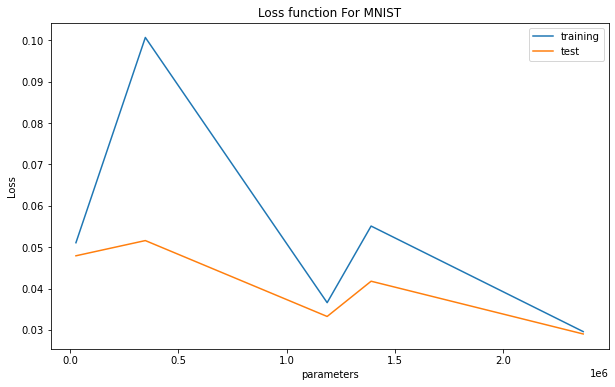

In [64]:
train_loss=[ train_loss_1[-1], train_loss_2[-1], train_loss_3[-1],train_loss_4[-1], train_loss_5[-1]]
test_loss = [ test_loss_1[-1], test_loss_2[-1],test_loss_3[-1], test_loss_4[-1], test_loss_5[-1]]
print(model_parameters[0])
import matplotlib.pyplot as plt
plt1=plt.figure(figsize=(10, 6))

print(train_loss_2[-7:-1])
print([model_parameters[0]*5])
n=1
parameters=[model_parameters[1]]*n + [model_parameters[2]]*n + [model_parameters[3]]*n+ [model_parameters[4]]*n + [model_parameters[5]]*n
#parameters
train_losses=train_loss_2[-n-1:-1] + train_loss_3[-n-1:-1] + train_loss_4[-n-1:-1] + train_loss_5[-n-1:-1] + train_loss_6[-n-1:-1]
#train_losses
train_param_zip=zip(parameters, train_losses)
train_parm= list(train_param_zip)
train_parm.sort(key=lambda x: x[0])
print(train_parm)

test_parmaters=[model_parameters[1]]*n + [model_parameters[2]]*n +[model_parameters[3]]*n+ [model_parameters[4]]*n + [model_parameters[5]]*n
test_losses=test_loss_2[-n-1:-1] + test_loss_3[-n-1:-1] + test_loss_4[-n-1:-1] + test_loss_5[-n-1:-1] +  test_loss_6[-n-1:-1]
test_param_zip=zip(test_parmaters, test_losses)
test_param=list(test_param_zip)
test_param.sort(key=lambda x: x[0])

plt.plot(np.array( [ t[0] for t in train_parm]),
            np.array( [ t[1] for t in train_parm] ), label='training')
plt.plot(np.array( [ t[0] for t in test_param]),
            np.array( [ t[1] for t in test_param] ), label='test')


#plt.scatter(np.array([model_parameters[1]]*n),np.array(train_loss_2[-n-1:-1]), label='test')

# naming the x axis
plt.xlabel('parameters')
# naming the y axis
plt.ylabel('Loss') 
plt.legend()
plt.title("Loss function For MNIST")
plt.show()





[98.45333333333333, 97.27333333333333, 98.95666666666666, 98.43666666666667, 99.10833333333333]


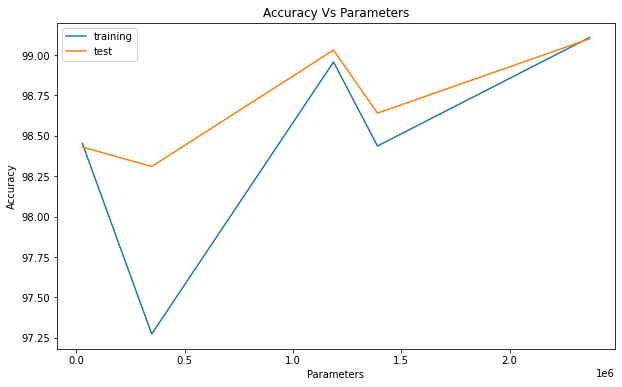

In [73]:
train_parameters_sort=[]
train_acc=[]
test_acc=[]
train_parameters
for p in sorted(train_parameters):
    train_parameters_sort.append(p)
    train_acc.append(train_parameters[p][0])
    test_acc.append(train_parameters[p][1])
train_acc.pop(2)
test_acc.pop(2)
train_parameters_sort.pop(2)
print(train_acc)
plt1=plt.figure(figsize=(10, 6))
plt.plot(np.array(train_parameters_sort),np.array(train_acc), label='training')
plt.plot(np.array(train_parameters_sort),np.array(test_acc), label='test')

# naming the x axis
plt.xlabel('Parameters')
# naming the y axis
plt.ylabel('Accuracy') 
plt.legend()
plt.title("Accuracy Vs Parameters")
plt.show()
